# Wich is the better plan?

In this project, a preliminary analysis of the rates of a carrier will be conducted based on a relatively small selection of customers. The behavior of the customers will be analyzed, and it will be determined which prepaid rate generates more revenue.

Below hypotheses will be tested:
 
1. The average income of users with Ultimate and Surf plans differs.
2. The average income of users in the New York-New Jersey area is different from users in other regions.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import scipy.stats as stats

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Giving a quick look into our data

In [3]:
calls.info()
print('_'*100)
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
____________________________________________________________________________________________________


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
internet.info()
print('_'*100)
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
____________________________________________________________________________________________________


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [5]:
messages.info()
print('_'*100)
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
____________________________________________________________________________________________________


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [6]:
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [7]:
users.info()
print('_'*100)
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
____________________________________________________________________________________________________


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Getting the basic info about Plan dataset

In [8]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [9]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


* It looks like all columns has the correct data type and it does not appear to exist absent data

## Giving a look to the Users dataset

In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
users.head(30)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


1. The columns 'reg_date' and 'churn_date' have the wrong data type, they should be of type datetime64 which can be corrected by changing the data type of the column.
2. There are missing values in the churn_date column which indicate that the rate is still in use at the time of data collection.

In [12]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


* There appears to be no atypical data in the "Users" DataFrame.
* Users are between 18 and 75 years old, with an average age of 46.

### Correcting data

In [13]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


* There are null values in churn date because the plan is still active, this according to the description of the data provided at the beginning and by the name of the column when translated into Spanish.

## Giving a look to Calls dataframe

In [16]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
calls.head(30)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


* The column "Call_date" should be of type datetime64
* There is data with zero in the column "Duration" so we have to see if it is possible to discard it. 
* The minutes in the "Duration" column should be rounded off.

### Correcting data

In [18]:
#Corrigiendo el tipo de datos en la columna "call_date"
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

#Redondeando hacia arriba el tiempo de las llamadas en la columna "duration"
def round_up(x):
    return np.ceil(x)

calls['duration'] = calls['duration'].apply(round_up)


In [19]:
#Convirtiendo el tipo de datos en la columna "duration" despues de aplicar el redondeo

calls['duration'] = calls['duration'].astype(int)

In [20]:
#Revisando que tanto afectan las llamadas perdidas a nuestro dataframe
calls_zero_count = (calls['duration'] == 0).sum()
calls_zero = (calls['duration'] == 0).mean() * 100
print(f'El porcentaje de llamadas perdidas es {calls_zero:.2f}%')
print(calls_zero_count)

El porcentaje de llamadas perdidas es 19.48%
26834


* The percentage of missed calls is high, however I will opt to dispose of them because they do not affect our analysis directly, as they were not direct calls.

## Giving a look to our Messages data

In [22]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
messages.head(30)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


* The message_date column has the wrong data type, it should be changed.
* There seems to be no missing data in any of the columns.

### Correcting data

In [24]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

In [25]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Giving a look to our Internet dataset

In [26]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [27]:
internet.head(30)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


* The session_date column has the wrong data type.
* There are users who did not use data without in some sessions, however you have to group by user and then see the total data used per month.

### Correcting data

In [28]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [29]:
#Averiguando cuentas sesiones individuales tiene un trafico de 0mb
internet_zero = (internet['mb_used'] == 0).mean() * 100
print(f'El porcentaje de sesiones de 0mb es {internet_zero:.2f}%')

int_zero_count = internet[internet['mb_used']==0].value_counts().sum()
print(f'El total de sesiones de 0mb es {int_zero_count}')


El porcentaje de sesiones de 0mb es 13.11%
El total de sesiones de 0mb es 13747


### Data enrichment

In [30]:
# Convirtiendo los mb a gb en el data frame de los planes
# Redondedeando hacia abajo
def rounding_data(data):
    rounding = np.ceil(data/1024)
    return rounding
plans['gb_per_month_included'] = plans['mb_per_month_included'].apply(rounding_data)

## Analyzing plan conditions

In [31]:

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Add data per user

In [32]:
calls['month'] = calls['call_date'].dt.month 

In [33]:
calls_per_month = calls.pivot_table(index=['user_id','month'], values = 'id', aggfunc='count').reset_index()

In [34]:
calls_per_month = calls_per_month.rename(columns={'id': 'calls_per_month'})

In [35]:
calls_per_month

,user_id,month,calls_per_month
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [36]:
calls['month'] = calls['call_date'].dt.month

In [37]:
pivot_calls = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()

In [38]:
pivot_calls

,user_id,month,duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [39]:
messages['month'] = messages['message_date'].dt.month

In [40]:
#Agrupando el trafico de usuario por mes
pivot_messages = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()

In [41]:
pivot_messages = pivot_messages.rename(columns={'id': 'messages_per_month'})

In [42]:
pivot_messages

,user_id,month,messages_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [43]:
internet['month'] = internet['session_date'].dt.month

In [44]:
#Agrupando el trafico de usuario por mes
pivot_internet = internet.pivot_table(index=['user_id', 'month'], values=['mb_used'], aggfunc='sum').reset_index()

In [45]:
# Convirtiendo los mb a gb 
def rounding_data(data):
    rounding = np.ceil(data/1024)
    return rounding
pivot_internet['gb_used'] = pivot_internet['mb_used'].apply(rounding_data)

In [46]:
pivot_internet

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0
...,...,...,...,...
2272,1498,12,23137.69,23.0
2273,1499,9,12984.76,13.0
2274,1499,10,19492.43,20.0
2275,1499,11,16813.83,17.0


In [47]:
pivot_internet.head()

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0


In [48]:
#Uniendo los DF pivoteados
merged_df = calls_per_month.merge(pivot_calls, on=['user_id', 'month'], how='left')\
                          .merge(pivot_messages, on=['user_id', 'month'], how='left')\
                          .merge(pivot_internet, on=['user_id', 'month'], how='left')\
                          .merge(users, on=['user_id'], how='left')

In [49]:
merged_df.head(10)

,user_id,month,calls_per_month,duration,messages_per_month,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12,16,124,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,8,27,182,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1001,9,49,315,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
3,1001,10,65,393,53.0,22330.49,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
4,1001,11,64,426,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
5,1001,12,56,412,44.0,19369.18,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
6,1002,10,11,59,15.0,6552.01,7.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
7,1002,11,55,386,32.0,19345.08,19.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
8,1002,12,47,384,41.0,14396.24,15.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
9,1003,12,149,1104,50.0,27044.14,27.0,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT


In [50]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2257
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             2258 non-null   int64         
 1   month               2258 non-null   int64         
 2   calls_per_month     2258 non-null   int64         
 3   duration            2258 non-null   int64         
 4   messages_per_month  1773 non-null   float64       
 5   mb_used             2243 non-null   float64       
 6   gb_used             2243 non-null   float64       
 7   first_name          2258 non-null   object        
 8   last_name           2258 non-null   object        
 9   age                 2258 non-null   int64         
 10  city                2258 non-null   object        
 11  reg_date            2258 non-null   datetime64[ns]
 12  plan                2258 non-null   object        
 13  churn_date          158 non-null    datetime64[n

In [51]:
#Buscando valores ausentes
merged_df.isnull().mean()

user_id               0.000000
month                 0.000000
calls_per_month       0.000000
duration              0.000000
messages_per_month    0.214792
mb_used               0.006643
gb_used               0.006643
first_name            0.000000
last_name             0.000000
age                   0.000000
city                  0.000000
reg_date              0.000000
plan                  0.000000
churn_date            0.930027
dtype: float64

In [52]:
merged_df.isnull().count()

user_id               2258
month                 2258
calls_per_month       2258
duration              2258
messages_per_month    2258
mb_used               2258
gb_used               2258
first_name            2258
last_name             2258
age                   2258
city                  2258
reg_date              2258
plan                  2258
churn_date            2258
dtype: int64

In [53]:
#Tratando valores ausentes
merged_df['duration'].fillna(0, inplace = True)
merged_df['calls_per_month'].fillna(0, inplace = True)
merged_df['mb_used'].fillna(0, inplace = True)
merged_df['gb_used'].fillna(0, inplace = True)
merged_df['messages_per_month'].fillna(0, inplace = True)


In [54]:
#Comprobando
merged_df.isna().mean()

user_id               0.000000
month                 0.000000
calls_per_month       0.000000
duration              0.000000
messages_per_month    0.000000
mb_used               0.000000
gb_used               0.000000
first_name            0.000000
last_name             0.000000
age                   0.000000
city                  0.000000
reg_date              0.000000
plan                  0.000000
churn_date            0.930027
dtype: float64

In [55]:
#Plan Surf
s = plans.loc[0, 'usd_monthly_pay']
sc = plans.loc[0, 'minutes_included']
sm = plans.loc[0, 'messages_included']
si = plans.loc[0, 'gb_per_month_included'] 
sac = plans.loc[0, 'usd_per_minute']
sam = plans.loc[0, 'usd_per_message']
sai = plans.loc[0, 'usd_per_gb']

#Plan Ultimate
u = plans.loc[1, 'usd_monthly_pay']
uc = plans.loc[1, 'minutes_included']
um = plans.loc[1, 'messages_included']
ui = plans.loc[1, 'gb_per_month_included']
uac = plans.loc[1, 'usd_per_minute']
uam = plans.loc[1, 'usd_per_message']
uai = plans.loc[1, 'usd_per_gb']

In [56]:
#Calculando excendentes de mensajes

def additional_messages(row):
    plan = row['plan']
    messages_sent = row['messages_per_month']
    
    default = {'surf':sm, 'ultimate':um}
    
    limit = default.get(plan,0)
    additional = max(0, messages_sent-limit)
    
    return additional

In [57]:
#Añadiendo la columna con el excedentes de mensajes

merged_df['additional_messages'] = merged_df.apply(additional_messages, axis = 1)

In [58]:
#Calculando excendentes de datos

def additional_data(row):
    plan = row ['plan']
    data_used = row['gb_used']
    
    default = {'surf':si, 'ultimate':ui}
    
    limit = default.get(plan, 0)
    additional = max(0, data_used-limit)
    
    return additional

In [59]:
#Añadiendo la columna con el excedentes de datos

merged_df['additional_data'] = merged_df.apply(additional_data, axis = 1)

In [60]:
#Calculando excendentes de llamadas

def additional_calls(row):
    plan = row ['plan']
    min_used = row['duration']
    
    default = {'surf':sc, 'ultimate':uc}
    
    limit = default.get(plan, 0)
    additional = max(0, min_used-limit)
    
    return additional

In [61]:
merged_df['additional_min_calls'] = merged_df.apply(additional_calls, axis = 1)

In [62]:
#Codigo viejo

def ing_user(row):
    plan = row['plan']
    additional_call = row['additional_min_calls']
    additional_messages = row['additional_messages']
    additional_data = row['additional_data']
    
    if plan == 'surf':
        ing = s + ((additional_call*sac)+(additional_messages*sam)+(additional_data*sai))
    else:
        ing = u + ((additional_call*uac)+(additional_messages*uam)+(additional_data*uai))
    return ing

In [63]:
merged_df['income'] = merged_df.apply(ing_user, axis = 1)

In [64]:
#Comprobando
merged_df.head()

,user_id,month,calls_per_month,duration,messages_per_month,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,additional_messages,additional_data,additional_min_calls,income
0,1000,12,16,124,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,0.0,0.0,0,70.00
1,1001,8,27,182,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0.0,0.0,0,20.00
2,1001,9,49,315,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0.0,0.0,0,20.00
3,1001,10,65,393,53.0,22330.49,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,3.0,7.0,0,90.09
4,1001,11,64,426,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0.0,4.0,0,60.00


## Studying user behavior

### Calls

In [65]:
mean_duration = merged_df.groupby(['month','plan'])['duration'].mean().reset_index()

In [66]:
calls_mean_month = mean_duration.pivot(index='month', columns='plan', values='duration')

<Figure size 720x432 with 0 Axes>

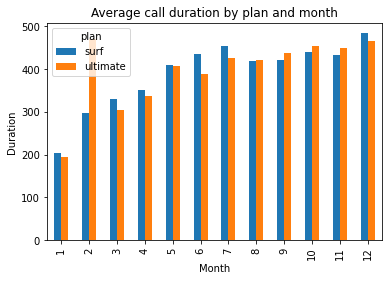

In [75]:
plt.figure(figsize=(10,6))
calls_mean_month.plot(kind='bar')
plt.title('Average call duration by plan and month')
plt.xlabel('Month')
plt.ylabel('Duration')
plt.show()


In [76]:

min_month = merged_df[['plan', 'duration']]
# Minutos para el plan Surf
surf_min = min_month[min_month['plan'] == 'surf']['duration']
# Minutos para el plan Ultimate
ultimate_min = min_month[min_month['plan'] == 'ultimate']['duration']

# Calcular la cantidad de minutos promedio por mes para cada plan
surf_avg_minutes = surf_min.groupby(surf_min.index).mean()
ultimate_avg_minutes = ultimate_min.groupby(ultimate_min.index).mean()


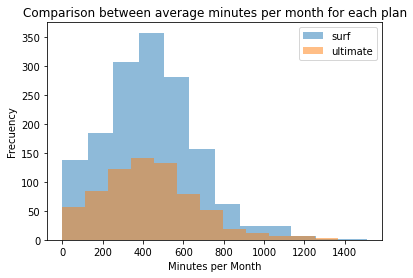

In [77]:
plt.hist(surf_avg_minutes, bins=12, alpha=0.5, label='surf')
plt.hist(ultimate_avg_minutes, bins=12, alpha=0.5, label='ultimate')
plt.xlabel('Minutes per Month')
plt.ylabel('Frecuency')
plt.title('Comparison between average minutes per month for each plan')
plt.legend()
plt.show()

In [78]:
merged_df.head(1)

,user_id,month,calls_per_month,duration,messages_per_month,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,additional_messages,additional_data,additional_min_calls,income
0,1000,12,16,124,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,0.0,0.0,0,70.0


In [79]:
#Calculando la media
mean_calc = merged_df.groupby(['month','plan'])['duration'].mean().reset_index()

#Calculando la varianza
var_calc = merged_df.groupby(['month','plan'])['duration'].var().reset_index()

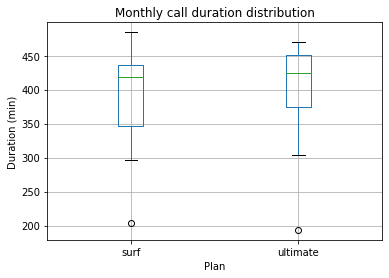

In [80]:

# Agrupando por mes y por tipo de plan
grouped = merged_df.groupby(['month', 'plan'])

# Creando un DF con la duracion promedio de las llamadas para cada tipo de plan
duration_monthly = grouped['duration'].mean().unstack()

#Trazando nuestro diagrama para visualizar la distribucion mensual de llamadas
duration_monthly.boxplot()
plt.title('Monthly call duration distribution')
plt.xlabel('Plan')
plt.ylabel('Duration (min)')
plt.show()


In [81]:
print(mean_calc)

    month      plan    duration
0       1      surf  203.000000
1       1  ultimate  193.500000
2       2      surf  297.000000
3       2  ultimate  470.333333
4       3      surf  330.000000
5       3  ultimate  304.250000
6       4      surf  351.540000
7       4  ultimate  336.857143
8       5      surf  410.240000
9       5  ultimate  406.241379
10      6      surf  435.791667
11      6  ultimate  387.444444
12      7      surf  453.733333
13      7  ultimate  427.067797
14      8      surf  417.849057
15      8  ultimate  421.436620
16      9      surf  420.732984
17      9  ultimate  437.511628
18     10      surf  438.991379
19     10  ultimate  455.028571
20     11      surf  432.494585
21     11  ultimate  448.730159
22     12      surf  484.501608
23     12  ultimate  465.261745


* Surf plan users make more calls than Ultimate plan users.

### Messages

In [82]:

messages_per_month = merged_df.groupby(['month', 'plan'])['messages_per_month'].sum().reset_index()


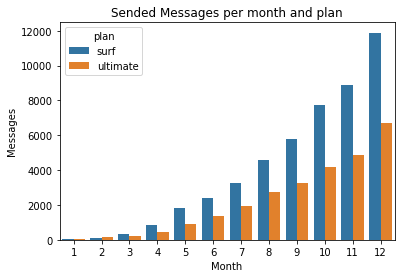

In [83]:

sns.barplot(x='month', y='messages_per_month', hue='plan', data=messages_per_month)
plt.title('Sended Messages per month and plan')
plt.xlabel('Month')
plt.ylabel('Messages')
plt.show()


### Internet

In [84]:
data_per_month = merged_df.groupby(['month', 'plan'])['gb_used'].sum().reset_index()

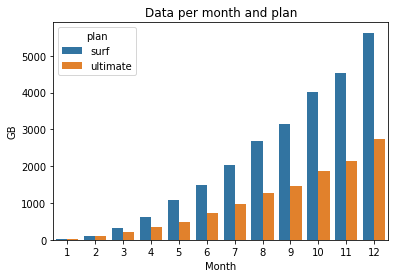

In [85]:
sns.barplot(x='month', y='gb_used', hue='plan', data=data_per_month)
plt.title('Data per month and plan')
plt.xlabel('Month')
plt.ylabel('GB')
plt.show()

## Income

In [86]:
income_by_plan = merged_df.groupby('plan')['income']
income_stats = income_by_plan.describe()
print(income_stats)

           count       mean        std   min   25%    50%   75%     max
plan                                                                   
surf      1545.0  60.125515  53.533338  20.0  20.0  40.42  80.3  590.37
ultimate   713.0  72.277700  11.351942  70.0  70.0  70.00  70.0  182.00


## Hypotheses Testing

* Null hypothesis: The average revenue of users of the Ultimate and Surf calling plans is the same.
* Alternative hypothesis: The average revenue of users of Ultimate and Surf calling plans is different.

In [ ]:
alpha = 0.05
surf_income = merged_df[merged_df['plan'] == 'surf']['income']
ultimate_income = merged_df[merged_df['plan'] == 'ultimate']['income']

t_stat, p_val = stats.ttest_ind(surf_income, ultimate_income, equal_var=False)
print('t-statistic:', t_stat)
print('p-value:', p_val)

if p_val < alpha:
    print('Existe una diferencia estadísticamente significativa en el ingreso promedio entre los usuarios de los planes Ultimate y Surf.')
else:
    print('No hay suficiente evidencia para concluir que exista una diferencia estadísticamente significativa en el ingreso promedio entre los usuarios de los planes Ultimate y Surf.')


t-statistic: -8.517344212487158
p-value: 3.363644868810119e-17
Existe una diferencia estadísticamente significativa en el ingreso promedio entre los usuarios de los planes Ultimate y Surf.


* The significance value chosen was 0.05 and this proved that there is a statistically significant difference between the income of the users of both plans.

* Null hypothesis: The average income of users in the NY-NJ area is the same as that of users in other regions.
* Alternative hypothesis: The average income of users in the NY-NJ area is different from that of users in other regions.

In [ ]:
merged_df['is_nynj'] = merged_df['city'].str.contains('NY-NJ')

nynj_income = merged_df.loc[merged_df['is_nynj'] == True, 'income']
other_income = merged_df.loc[merged_df['is_nynj'] == False, 'income']

nynj_income_mean = nynj_income.mean()
other_income_mean = other_income.mean()


In [ ]:
from scipy.stats import ttest_ind

t, p = ttest_ind(nynj_income, other_income, equal_var=False)

alpha = 0.05

if p < alpha:
    print("Hay una diferencia significativa entre los ingresos promedio de los usuarios de NY-NJ y de otras regiones.")
else:
    print("No hay una diferencia significativa entre los ingresos promedio de los usuarios de NY-NJ y de otras regiones.")


In [ ]:
income_by_plan = merged_df.groupby('plan')['income'].mean()
print(income_by_plan)

## General conclusion
To begin with, a data cleaning was carried out to prepare our dataset for analysis, duplicate values were eliminated, incomplete and null values were treated. Subsequently, a statistical analysis was performed to evaluate the behavior of the users of both plans, and the following was found:
1. There is a significant difference between the average earnings of users in New York-New Jersey and other regions.
2. The result of the statistical test indicates that the average revenue of users of the Ultimate and Surf calling plans is significantly different. This is because the p-value is much smaller than the typical alpha value of .05. Consequently, we can reject the null hypothesis and conclude that there is a statistically significant difference in the average revenue between Ultimate and Surf plan users.
3. The Ultimate plan produces higher revenues than the Surf plan.

This analysis provides us with an overview of the behavior of users regarding the different benefits of each plan and how their telephone consumption habits vary depending on their geographic area and the plan contracted.